In [1]:
import pandas as pd

df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df.drop('ID', axis=1, inplace=True) 

- The dataset has data on 5000 customers.
- We have 14 variables including 13 independent variables and 1 dependent variable which is Personal Loan.
- We have 6 numeric variables: ID , Age , Experience , Income , CC_Avg , Mortgage
- We have 3 categorical variables: Family , Education , Zip_Code
- We have 5 Boolean variables: Personal_Loan , Securities Account ,zCD_Account , Online , Credit_Card
- There is no missing value in the dataset.
- There are no duplicates in the dataset.
- The dataset contains negative values for the Experience, which is unreasonable.

In [2]:
len(df)

5000

In [3]:
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
print(df[df['Experience']<0]['Experience'].value_counts())
df['Experience'] = df['Experience'].apply(abs)

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
Cat_Features = ['CD Account','Education','Family','Securities Account','Online','Securities Account']
Num_Features = ['CCAvg','Income','Mortgage','Age','Experience']
Target = 'Personal Loan'

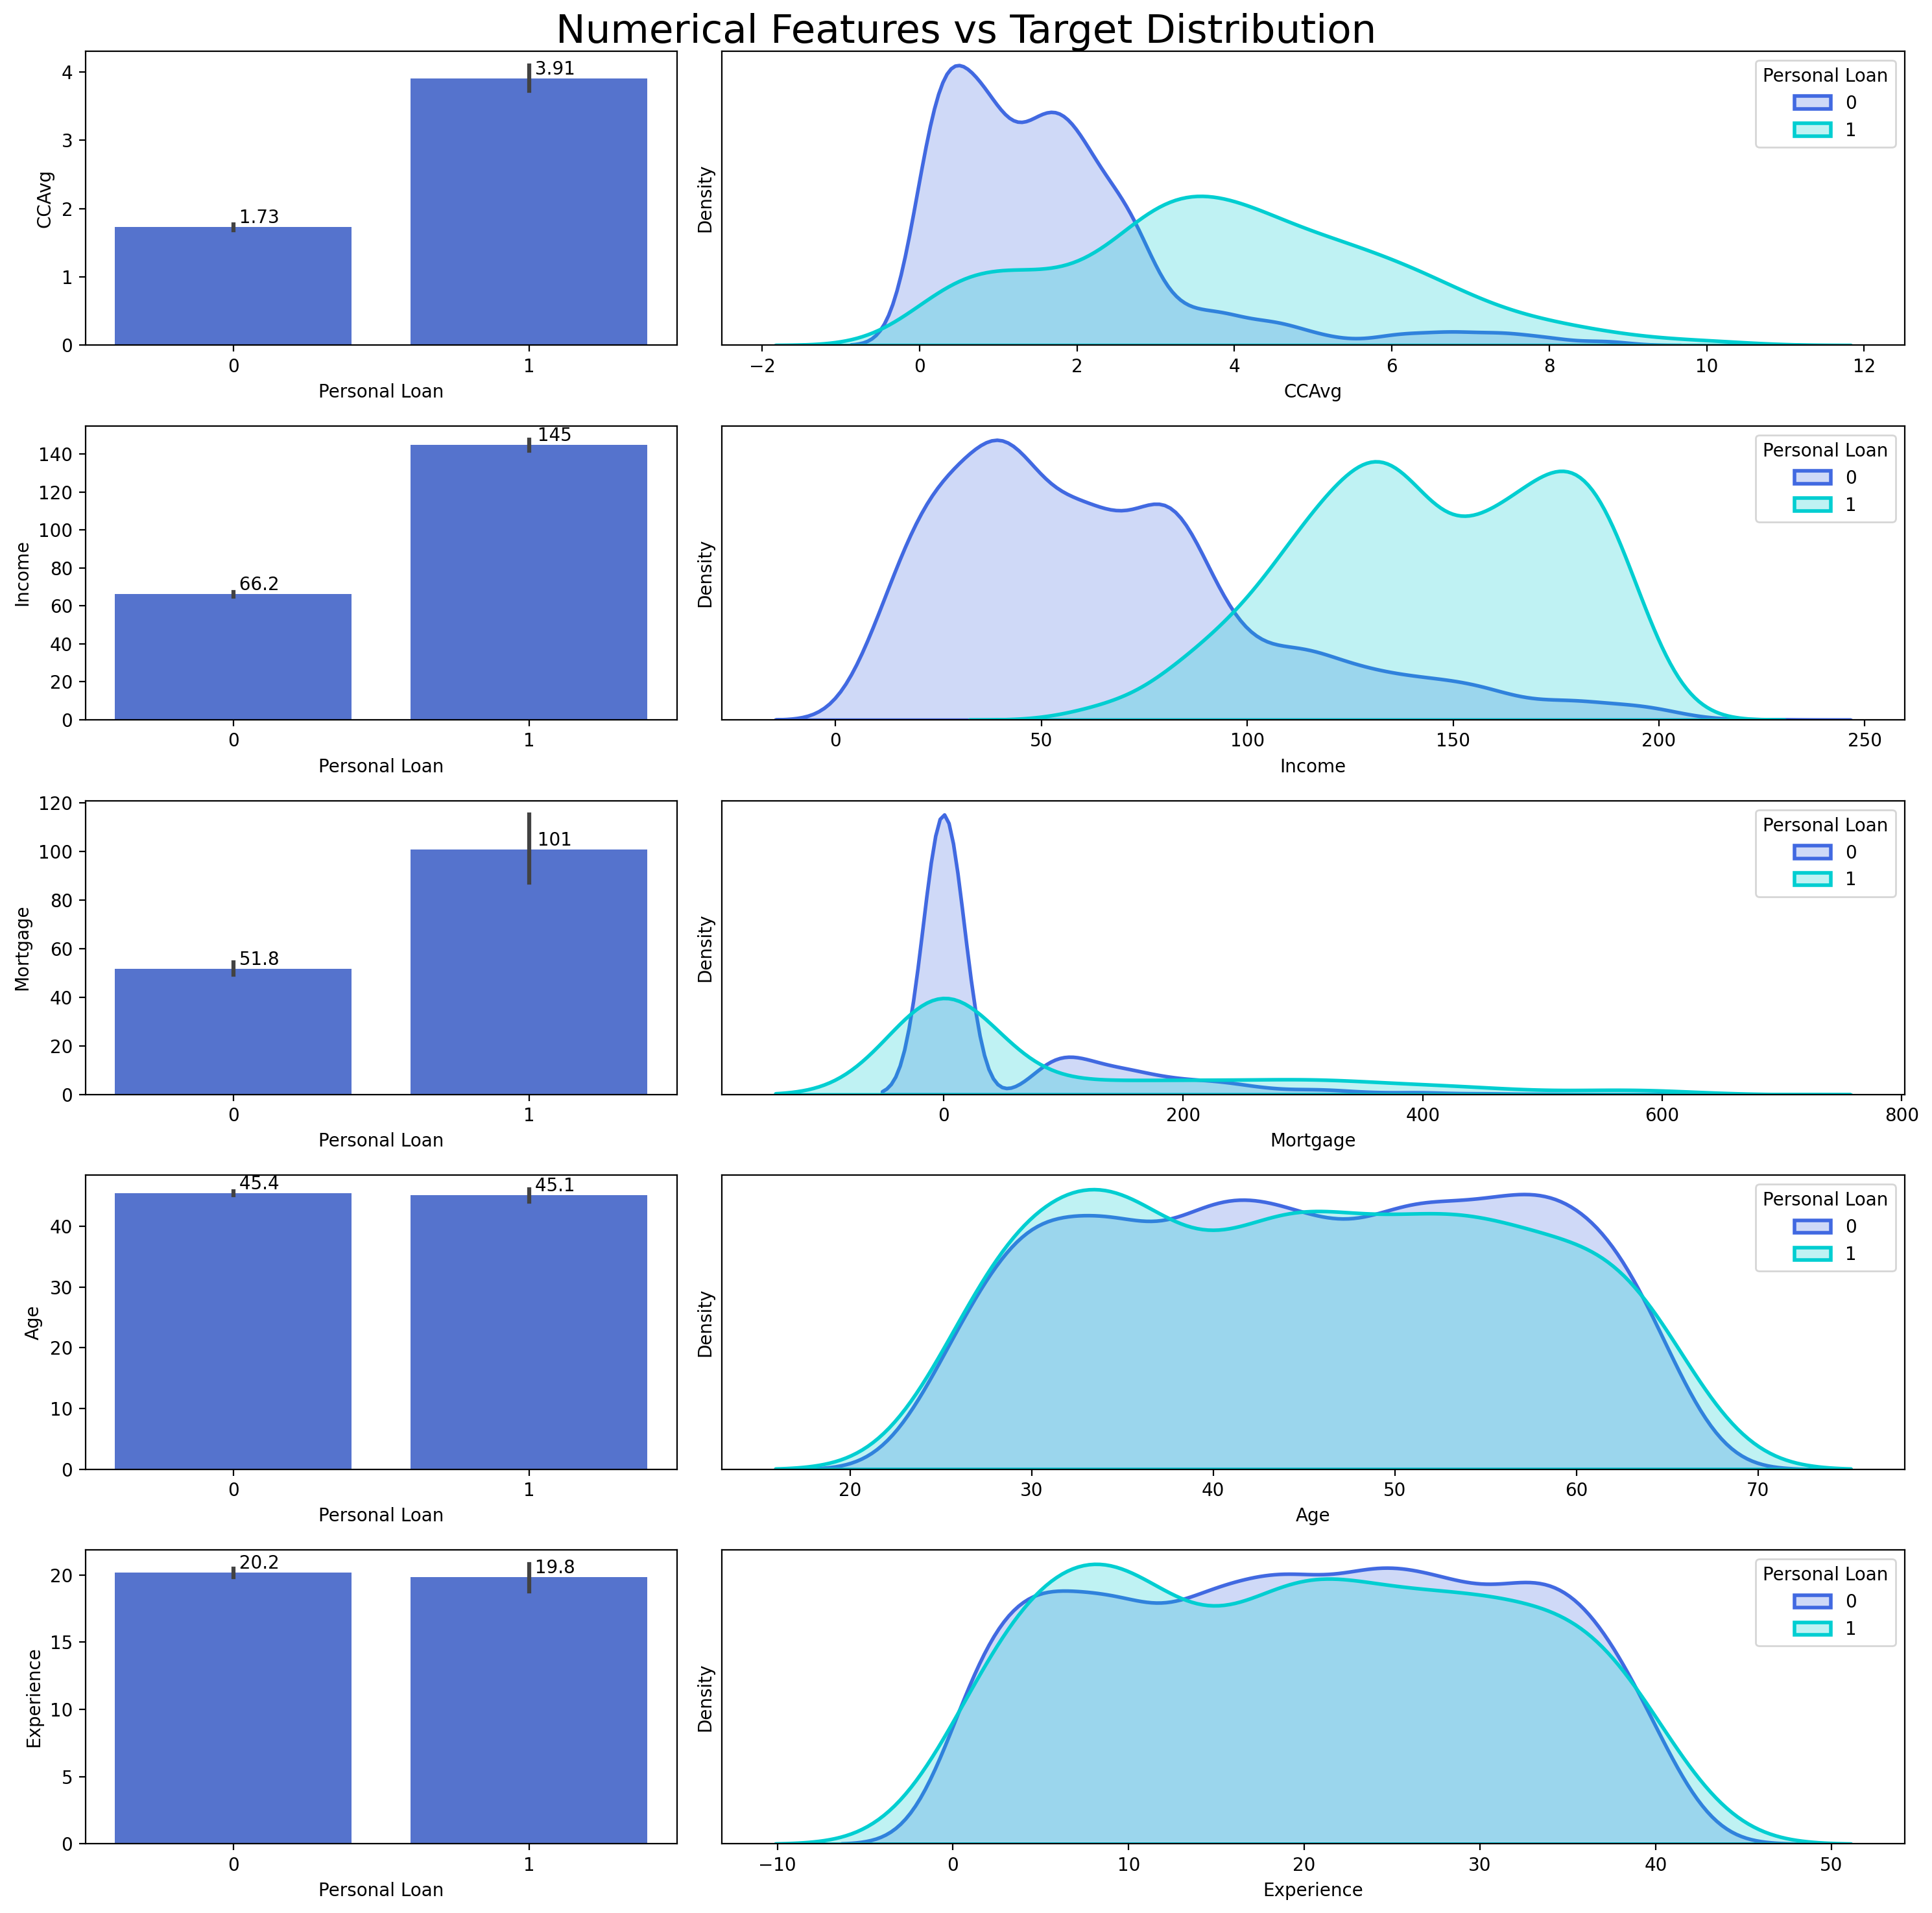

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(5, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Personal Loan', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [9]:
df.drop('Experience', axis=1, inplace=True)

In [32]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'] 

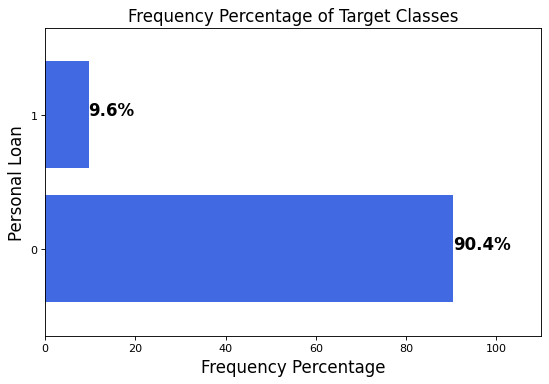

In [11]:
plt.figure(dpi=80)

df['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

labels = df['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

In [12]:
import numpy as np

print(np.bincount(y))
print(np.bincount(y))

[4520  480]
[4520  480]


In [13]:
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y)

y_pred = lr.predict(X_test_scaled)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
specificity = tn / (tn + fp)

print(classification_report(y, y_pred))
print(f"Recall: {recall_score(y, y_pred):.2f}")
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4520
           1       0.83      0.63      0.72       480

    accuracy                           0.95      5000
   macro avg       0.90      0.81      0.85      5000
weighted avg       0.95      0.95      0.95      5000

Recall: 0.63
Specificity: 0.99


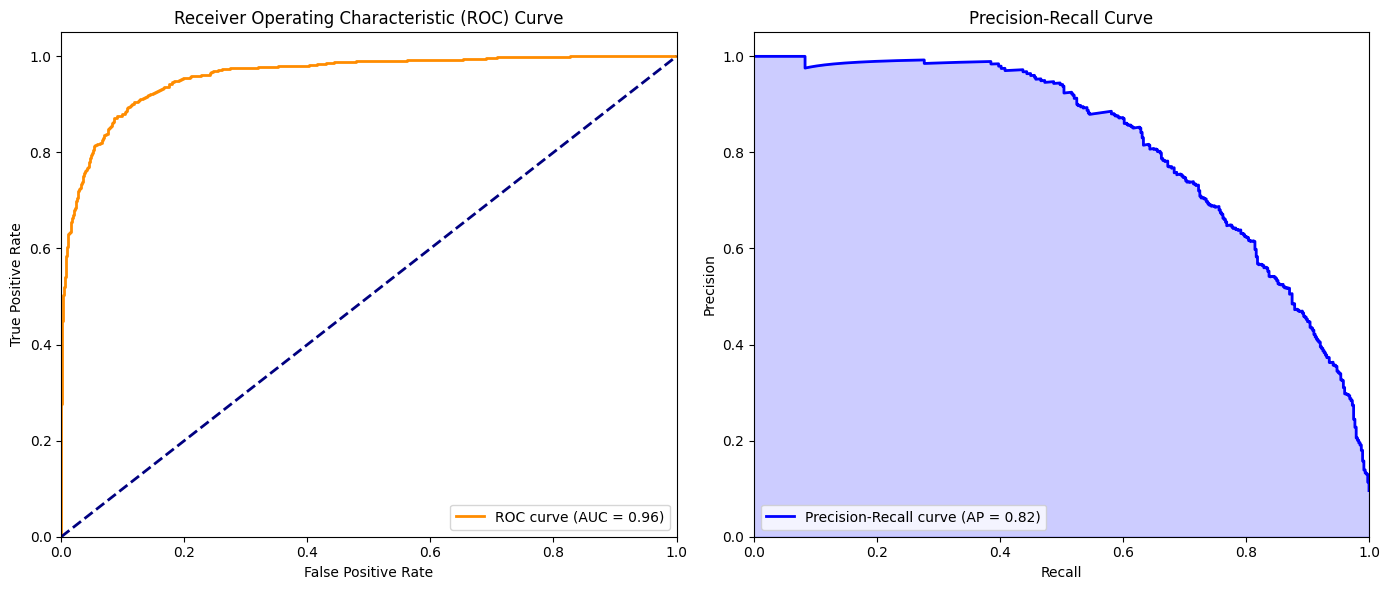

AUC-ROC: 0.959
AUC-PR: 0.816
Average Precision: 0.816


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

y_scores = lr.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y, y_scores)
pr_auc = auc(recall, precision)
average_precision = average_precision_score(y, y_scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

print(f"AUC-ROC: {roc_auc:.3f}")
print(f"AUC-PR: {pr_auc:.3f}")
print(f"Average Precision: {average_precision:.3f}")

In [18]:
print(np.argmax(tpr))
print(np.argmax(fpr))

370
371


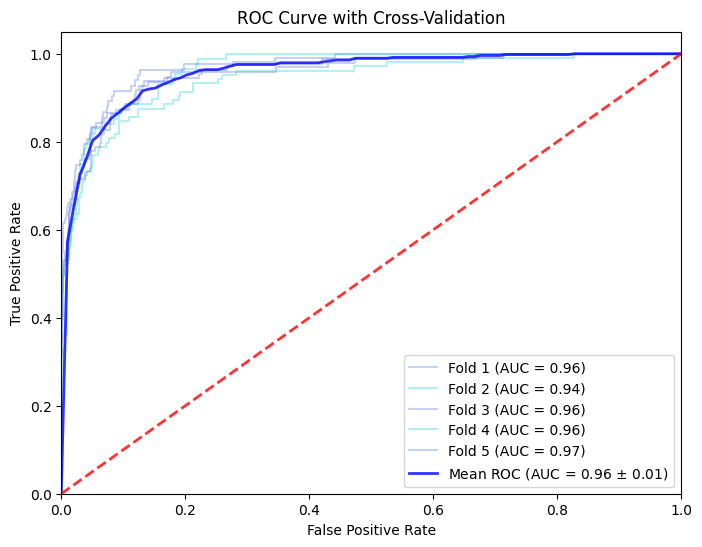

In [19]:
import numpy as np
from sklearn.model_selection import KFold


cv = KFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for i, (train, test) in enumerate(cv.split(X, y)):

    scaler = StandardScaler().fit(X.iloc[train])
    X_train_scaled = scaler.transform(X.iloc[train])
    X_test_scaled = scaler.transform(X.iloc[test])

    lr.fit(X_train_scaled, y[train])

    y_proba = lr.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y[test], y_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=f'Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})',
         lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cross-Validation')
plt.legend(loc="lower right")
plt.show()

In [20]:
print(np.argmax(tpr))
print(np.argmax(fpr))

76
77


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train shape: (4000, 11)
Class distribution: [3618  382]


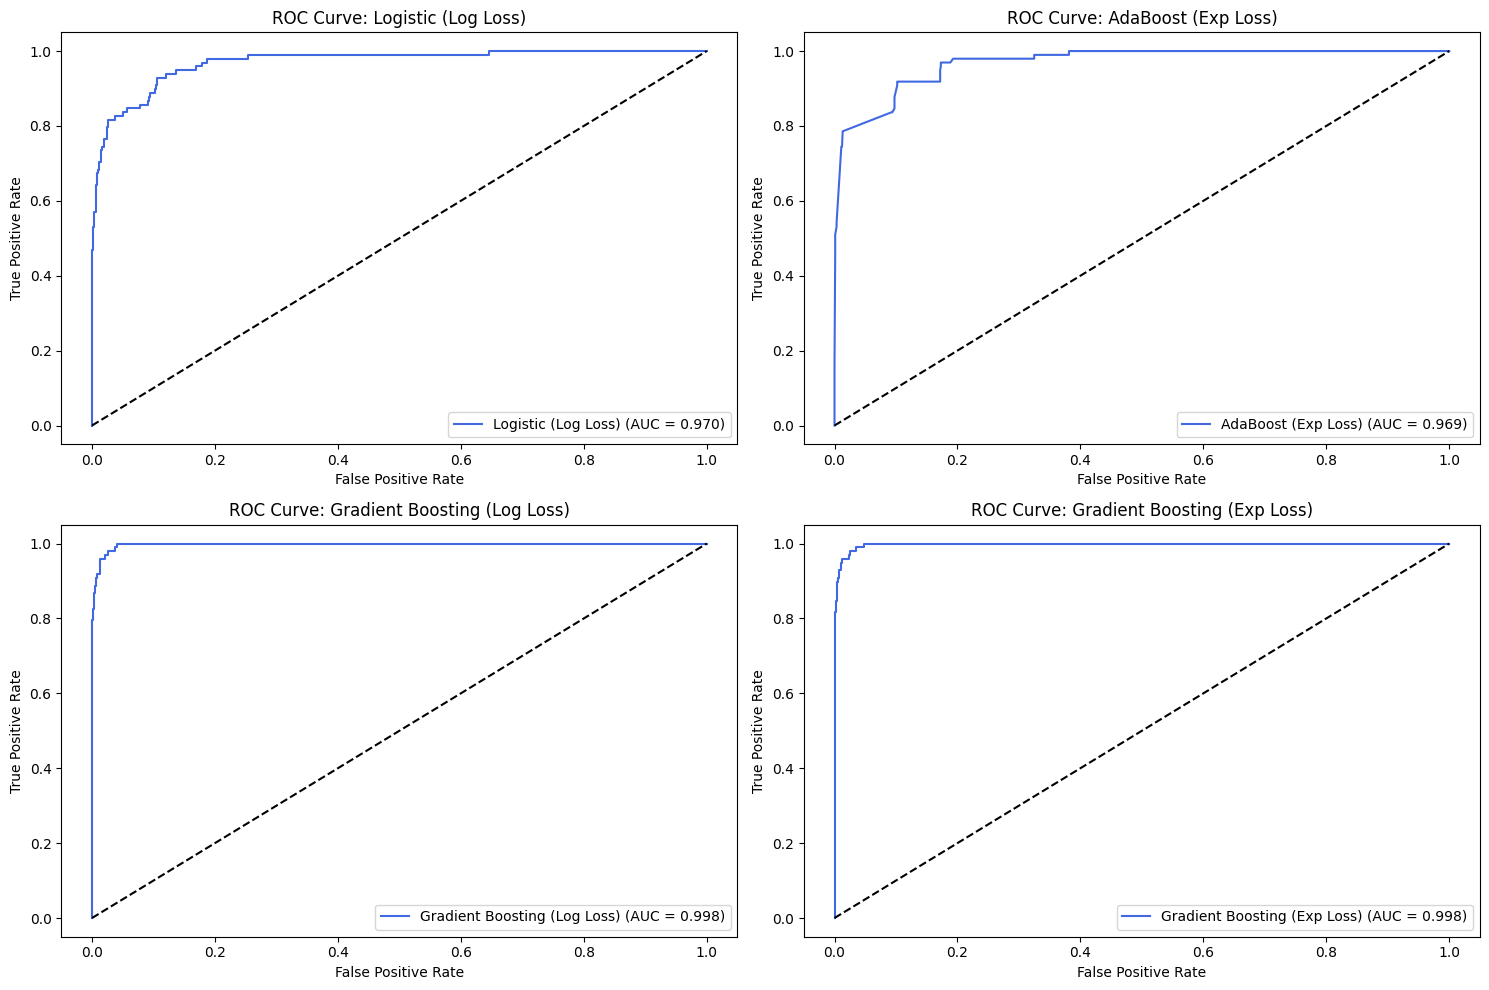

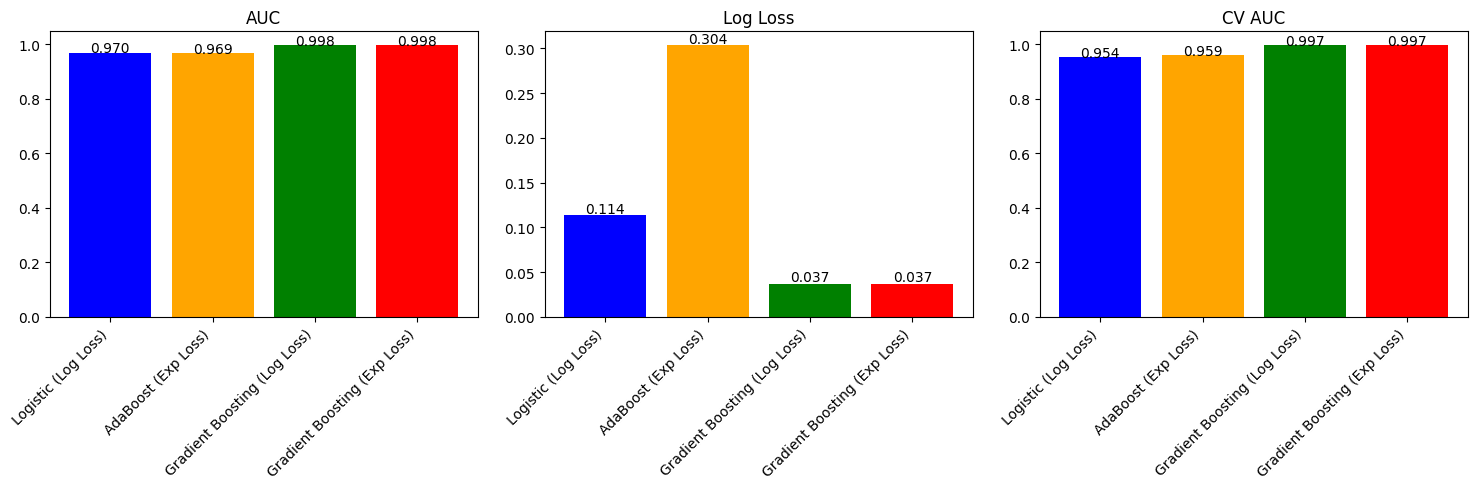


Результаты сравнения моделей:

Logistic (Log Loss):
AUC: 0.9698
Log Loss: 0.1139
Cross-Val AUC: 0.9535

AdaBoost (Exp Loss):
AUC: 0.9690
Log Loss: 0.3040
Cross-Val AUC: 0.9595

Gradient Boosting (Log Loss):
AUC: 0.9977
Log Loss: 0.0371
Cross-Val AUC: 0.9966

Gradient Boosting (Exp Loss):
AUC: 0.9978
Log Loss: 0.0373
Cross-Val AUC: 0.9970


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression

print(f"X_train shape: {X_train_scaled.shape}")
print(f"Class distribution: {np.bincount(y_train)}")

models = {
    "Logistic (Log Loss)": LogisticRegression(max_iter=1000),
    "AdaBoost (Exp Loss)": AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    "Gradient Boosting (Log Loss)": GradientBoostingClassifier(n_estimators=100, loss='log_loss', learning_rate=0.1),
    "Gradient Boosting (Exp Loss)": GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1)
}

plt.figure(figsize=(15, 10))
results = {}

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    auc = roc_auc_score(y_test, y_proba)
    loss = log_loss(y_test, y_proba)
    cv_auc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc').mean()
    
    results[name] = {'AUC': auc, 'Log Loss': loss, 'CV AUC': cv_auc}
    
    # ROC кривая
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.subplot(2, 2, i)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

metrics = ['AUC', 'Log Loss', 'CV AUC']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    values = [res[metric] for res in results.values()]
    plt.bar(results.keys(), values, color=['blue', 'orange', 'green', 'red'])
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')
    for j, v in enumerate(values):
        plt.text(j, v + 0.01*(max(values)-min(values)), f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

print("\nРезультаты сравнения моделей:")
for name, res in results.items():
    print(f"\n{name}:")
    print(f"AUC: {res['AUC']:.4f}")
    print(f"Log Loss: {res['Log Loss']:.4f}")
    print(f"Cross-Val AUC: {res['CV AUC']:.4f}")

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.utils import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

print(f"\nВеса классов для балансировки: {class_weights}")


Веса классов для балансировки: {np.int64(0): np.float64(0.552791597567717), np.int64(1): np.float64(5.2356020942408374)}


In [25]:
lr = LogisticRegression(max_iter=1000, class_weight=class_weights)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(classification_report(y_test, y_pred))
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       902
           1       0.51      0.92      0.65        98

    accuracy                           0.91      1000
   macro avg       0.75      0.91      0.80      1000
weighted avg       0.94      0.91      0.92      1000

Specificity: 0.90
